## 生成Deeplearningのcodeをpytorchで実装する

1. 02_01_deep_learning_deep_neural_network.ipynb
2. 02_03_deep_learning_conv_neural_network.ipynb


- TensorFlowのコード  
https://github.com/davidADSP/GDL_code

### 問題点
1. 精度が悪い

In [25]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms

from sklearn.metrics import accuracy_score
%matplotlib inline

## data

In [26]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## architecture

In [27]:
# dataloader の確認
image,label = iter(trainloader).__next__()
print(image.shape, label)
print(image.view(32, -1).shape)

torch.Size([64, 3, 32, 32]) tensor([2, 1, 5, 0, 0, 9, 7, 6, 9, 5, 4, 2, 7, 5, 8, 9, 6, 9, 4, 7, 0, 5, 6, 7,
        3, 5, 4, 5, 7, 6, 6, 1, 9, 9, 4, 4, 6, 6, 7, 1, 3, 9, 6, 0, 8, 2, 2, 4,
        0, 3, 5, 4, 1, 5, 1, 5, 2, 7, 9, 4, 6, 4, 7, 4])
torch.Size([32, 6144])


In [4]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(3072, 200)
        self.fc2 = nn.Linear(200, 150)
        self.fc3 = nn.Linear(150, 10)        

    def forward(self, x):
        # 適宜batch_sizeを定義しないと切れ目でエラーになる
        x = x.view(-1, x.shape[1] * x.shape[2] * x.shape[2])
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # x = F.softmax(x)
        return x

model = Model()

In [36]:
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [37]:
for epoch in range(5):
  running_loss = 0.0
  for i, (images, labels) in enumerate(trainloader):
    images = images.to(device)
    labels = labels.to(device)
    # zero the parameter gradients
    optimizer.zero_grad()    
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()   
    
    # print statistics
    running_loss += loss.item()
    if i % 200 == 199:
      print('[%d, %5d] loss: %.3f' %
            (epoch + 1, i + 1, running_loss / 200))
      running_loss = 0.0

print('Finished Training')     


[1,   200] loss: 1.949
[1,   400] loss: 1.635
[1,   600] loss: 1.534
[2,   200] loss: 1.400
[2,   400] loss: 1.361
[2,   600] loss: 1.330
[3,   200] loss: 1.235
[3,   400] loss: 1.219
[3,   600] loss: 1.215
[4,   200] loss: 1.143
[4,   400] loss: 1.149
[4,   600] loss: 1.121
[5,   200] loss: 1.078
[5,   400] loss: 1.065
[5,   600] loss: 1.079
Finished Training


## <font color='blue'>遭遇したエラー</font>
```
RuntimeError: mat1 dim 1 must match mat2 dim 0
```

**解決策**  
```python
    def forward(self, x):
        # 適宜batch_sizeを定義しないと切れ目でエラーになる
        batch_size = x.shape[0]
```


In [38]:
total_score = 0
all_preds = []
all_true_labels = []
for i, (images, labels) in enumerate(testloader):
    images = images.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, axis=1)
    preds = preds.to('cpu').detach().numpy().copy()
    all_preds.extend(preds)
    all_true_labels.extend(labels)
    score = accuracy_score(preds, labels)
    total_score += score / len(testloader)
print(total_score)

0.606687898089172


In [34]:
# https://qiita.com/yasudadesu/items/1dda5f9d1708b6d4d923
from torchsummary import summary
device = 'cuda' if torch.cuda.is_available else 'cpu'
model = Model().to(device)
# エラーが取れない
# summary(model, (32, 3, 32, 32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

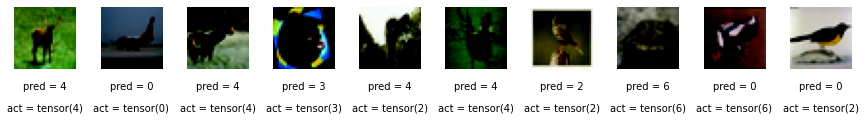

In [35]:
n_to_show = 10
indices = np.random.choice(range(len(all_preds)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = testset[idx][0]
    img = img.squeeze().permute(1,2,0)
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(all_preds[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(all_true_labels[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

# tips
## squeeze()
サイズが１の全ての次元を削除する  
https://pytorch.org/docs/stable/generated/torch.squeeze.html

## permute
指定した順序に次元を入れ替える  
https://pytorch.org/docs/stable/tensors.html



# モデルの改善

kerasの`padding=same`を実現できているか怪しい

In [28]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1)
        self.batch_norm1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=2)
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, stride=1)
        self.batch_norm3 = nn.BatchNorm2d(16)
        self.conv4 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=2)
        self.batch_norm4 = nn.BatchNorm2d(16)
        # self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(400, 128)
        self.batch_norm5 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        batch_size = x.shape[0]
        # x = F.pad(x, (0, 0, 2, 1))  # [left, right, top, bot]
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = F.leaky_relu(x)
        x = self.conv2(x)
        x = self.batch_norm2(x)
        x = F.leaky_relu(x)
        x = self.conv3(x)
        x = self.batch_norm3(x)
        x = F.leaky_relu(x)
        x = self.conv4(x)   
        x = self.batch_norm4(x)
        x = F.leaky_relu(x)
        # flatten()
        x = x.view(batch_size, -1)
        x = F.relu(self.fc1(x))
        x = self.batch_norm5(x)        
        x = F.leaky_relu(x)
        x = self.dropout(x)   
        x = self.fc2(x)
        return x
model = Model()

## Conv2D
- in_channels: int (入力チャネル数)
- out_channels: int (出力チャネル数)
- kernel_size: Union[T, Tuple[T, T]]
- stride: Union[T, Tuple[T, T]] = 1
- padding: Union[T, Tuple[T, T]] = 0,



## 公式のモデル
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [11]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # <-- (入力 [batchsize, 3, 32, 32])
        x = self.pool(F.relu(self.conv2(x))) # <-- (入力 [batchsize, 6, 14, 14]) (チャネル数が2倍)    
        x = x.view(-1, 16 * 5 * 5)# <-- (入力 [batchsize, 16, 5, 5]) (チャネル数が2倍)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = Model()